In [1]:
using Luxor
using MathTeXEngine

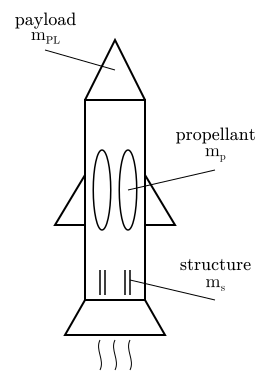

In [13]:
Drawing(280, 390, "../images/single-stage-rocket.svg")
background("white")
origin(Point(115, 200))
sethue("black")

# === Rocket Body ===
setline(2)

# Main body dimensions
body_width = 60
body_height = 200
body_top = -body_height/2
body_bottom = body_height/2

# Nose cone (payload section)
nose_height = 60
move(Point(-body_width/2, body_top))
line(Point(0, body_top - nose_height))
line(Point(body_width/2, body_top))
strokepath()

# Main body rectangle
rect(Point(-body_width/2, body_top), body_width, body_height, :stroke)

# === Payload section line (separating nose cone from body) ===
setline(1.5)
line(Point(-body_width/2, body_top), Point(body_width/2, body_top), :stroke)

# === Propellant tanks (two large oval tanks in middle section) ===
setline(1.5)
tank_width = 45
tank_height = 160  # Increased from 120
tank_y = body_top + 90  # Adjusted position

# Left tank
ellipse(Point(-body_width/4 + 2, tank_y), tank_width/2 - 5, tank_height/2, :stroke)
# Right tank  
right_tank_x = body_width/4 - 2
ellipse(Point(right_tank_x, tank_y), tank_width/2 - 5, tank_height/2, :stroke)

# === Structural elements / piping (in lower section) ===
struct_y = body_top + 180

# Vertical pipes/lines
setline(1.5)
line(Point(-15, struct_y - 10), Point(-15, struct_y + 15), :stroke)
line(Point(-10, struct_y - 10), Point(-10, struct_y + 15), :stroke)
line(Point(10, struct_y - 10), Point(10, struct_y + 15), :stroke)
line(Point(15, struct_y - 10), Point(15, struct_y + 15), :stroke)

# === Fins (triangular, midway along the body) ===
setline(2)
fin_width = 30
fin_height = 50
fin_y = 0  # Midway along body

# Left fin (simple triangle)
move(Point(-body_width/2, fin_y - fin_height/2))
line(Point(-body_width/2 - fin_width, fin_y + fin_height/2))
line(Point(-body_width/2, fin_y + fin_height/2))
closepath()
strokepath()

# Right fin (simple triangle)
move(Point(body_width/2, fin_y - fin_height/2))
line(Point(body_width/2 + fin_width, fin_y + fin_height/2))
line(Point(body_width/2, fin_y + fin_height/2))
closepath()
strokepath()

# === Nozzle at bottom (starts at body width, expands outward) ===
nozzle_top_width = body_width  # Same width as body
nozzle_bottom_width = body_width + 40
nozzle_height = 35

move(Point(-nozzle_top_width/2, body_bottom))
line(Point(-nozzle_bottom_width/2, body_bottom + nozzle_height))
line(Point(nozzle_bottom_width/2, body_bottom + nozzle_height))
line(Point(nozzle_top_width/2, body_bottom))
strokepath()

# Nozzle exhaust suggestion (wavy lines)
setline(1)
for i in [-15, 0, 15]
    move(Point(i, body_bottom + nozzle_height + 5))
    curve(Point(i - 5, body_bottom + nozzle_height + 15), Point(i + 5, body_bottom + nozzle_height + 25), Point(i, body_bottom + nozzle_height + 35))
    strokepath()
end

# === Leader lines and labels ===
setline(1)
fontsize(18)

# m_PL label (payload - pointing to nose cone)
line(Point(0, body_top - nose_height/2), Point(-70, body_top - nose_height/2 - 20), :stroke)
text(L"m_{\text{PL}}", Point(-70, body_top - nose_height/2 - 30), halign=:center, valign=:bottom)
text(L"\text{payload}", Point(-70, body_top - nose_height/2 - 45), halign=:center, valign=:bottom)

# m_p label (propellant - line connects to center of right tank)
mp_label_x = body_width/2 + 70
mp_label_y = tank_y - 20
line(Point(right_tank_x, tank_y), Point(mp_label_x, mp_label_y), :stroke)
text(L"m_p", Point(mp_label_x, mp_label_y - 15), halign=:center, valign=:middle)
text(L"\text{propellant}", Point(mp_label_x, mp_label_y - 30), halign=:center, valign=:bottom)

# m_s label (structure - line connects to rightmost pipe)
ms_label_x = body_width/2 + 70
ms_label_y = struct_y + 20
line(Point(15, struct_y), Point(ms_label_x, ms_label_y), :stroke)
text(L"m_s", Point(ms_label_x, ms_label_y - 15), halign=:center, valign=:middle)
text(L"\text{structure}", Point(ms_label_x, ms_label_y - 30), halign=:center, valign=:bottom)

finish()
preview()

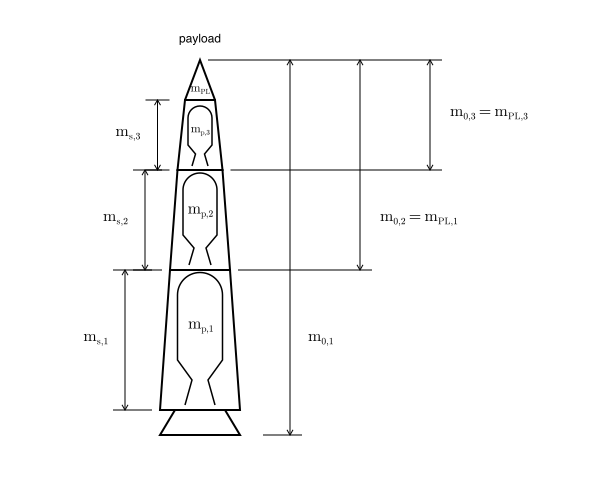

In [39]:
Drawing(600, 500, "../images/three-stage-rocket.svg")
background("white")
origin(Point(200, 280))
sethue("black")

# === Stage dimensions ===
# Stage 1 (bottom, largest)
s1_width = 80
s1_height = 140
s1_bottom = 130
s1_top = s1_bottom - s1_height

# Stage 2 (middle)
s2_width = 60
s2_height = 100
s2_bottom = s1_top
s2_top = s2_bottom - s2_height

# Stage 3 (top, smallest)
s3_width = 45
s3_height = 70
s3_bottom = s2_top
s3_top = s3_bottom - s3_height

# Payload (nose cone)
payload_height = 40
payload_top = s3_top - payload_height

# Helper function to draw double-headed arrow
function draw_double_arrow(p1::Point, p2::Point; headsize=6)
    line(p1, p2, :stroke)
    angle = atan(p2.y - p1.y, p2.x - p1.x)
    # Arrowhead at p1
    move(Point(p1.x + headsize * cos(angle - π/6), p1.y + headsize * sin(angle - π/6)))
    line(p1)
    line(Point(p1.x + headsize * cos(angle + π/6), p1.y + headsize * sin(angle + π/6)))
    strokepath()
    # Arrowhead at p2
    move(Point(p2.x - headsize * cos(angle - π/6), p2.y - headsize * sin(angle - π/6)))
    line(p2)
    line(Point(p2.x - headsize * cos(angle + π/6), p2.y - headsize * sin(angle + π/6)))
    strokepath()
end

# === Draw Stage 1 ===
setline(2)

# Stage 1 body (trapezoid - wider at bottom)
move(Point(-s1_width/2, s1_bottom))
line(Point(-s2_width/2, s1_top))
line(Point(s2_width/2, s1_top))
line(Point(s1_width/2, s1_bottom))
closepath()
strokepath()

# Stage 1 nozzle/engine (external)
nozzle1_width = 50
nozzle1_height = 25
move(Point(-nozzle1_width/2, s1_bottom))
line(Point(-nozzle1_width/2 - 15, s1_bottom + nozzle1_height))
line(Point(nozzle1_width/2 + 15, s1_bottom + nozzle1_height))
line(Point(nozzle1_width/2, s1_bottom))
strokepath()

# Stage 1 internal combustion chamber + nozzle shape
setline(1.5)
cc1_top = s1_top + 25
cc1_width = 45
cc1_chamber_bottom = s1_bottom - 50
nz1_throat_width = 16
nz1_throat_y = s1_bottom - 30
nz1_exit_width = 30
nz1_exit_y = s1_bottom - 5

move(Point(-nz1_exit_width/2, nz1_exit_y))
line(Point(-nz1_throat_width/2, nz1_throat_y))
line(Point(-cc1_width/2, cc1_chamber_bottom))
line(Point(-cc1_width/2, cc1_top))
arc2r(Point(0, cc1_top), Point(-cc1_width/2, cc1_top), Point(cc1_width/2, cc1_top), :stroke)
move(Point(cc1_width/2, cc1_top))
line(Point(cc1_width/2, cc1_chamber_bottom))
line(Point(nz1_throat_width/2, nz1_throat_y))
line(Point(nz1_exit_width/2, nz1_exit_y))
strokepath()

# === Draw Stage 2 ===
setline(2)

# Stage 2 body (trapezoid)
move(Point(-s2_width/2, s2_bottom))
line(Point(-s3_width/2, s2_top))
line(Point(s3_width/2, s2_top))
line(Point(s2_width/2, s2_bottom))
closepath()
strokepath()

# Stage 2 internal combustion chamber + nozzle shape
setline(1.5)
cc2_top = s2_top + 20
cc2_width = 34
cc2_chamber_bottom = s2_bottom - 35
nz2_throat_width = 12
nz2_throat_y = s2_bottom - 22
nz2_exit_width = 22
nz2_exit_y = s2_bottom - 5

move(Point(-nz2_exit_width/2, nz2_exit_y))
line(Point(-nz2_throat_width/2, nz2_throat_y))
line(Point(-cc2_width/2, cc2_chamber_bottom))
line(Point(-cc2_width/2, cc2_top))
arc2r(Point(0, cc2_top), Point(-cc2_width/2, cc2_top), Point(cc2_width/2, cc2_top), :stroke)
move(Point(cc2_width/2, cc2_top))
line(Point(cc2_width/2, cc2_chamber_bottom))
line(Point(nz2_throat_width/2, nz2_throat_y))
line(Point(nz2_exit_width/2, nz2_exit_y))
strokepath()

# === Draw Stage 3 ===
setline(2)

# Stage 3 body (trapezoid to payload)
move(Point(-s3_width/2, s3_bottom))
line(Point(-s3_width/3, s3_top))
line(Point(s3_width/3, s3_top))
line(Point(s3_width/2, s3_bottom))
closepath()
strokepath()

# Stage 3 internal combustion chamber + nozzle shape
setline(1.5)
cc3_top = s3_top + 18
cc3_width = 24
cc3_chamber_bottom = s3_bottom - 25
nz3_throat_width = 9
nz3_throat_y = s3_bottom - 16
nz3_exit_width = 16
nz3_exit_y = s3_bottom - 4

move(Point(-nz3_exit_width/2, nz3_exit_y))
line(Point(-nz3_throat_width/2, nz3_throat_y))
line(Point(-cc3_width/2, cc3_chamber_bottom))
line(Point(-cc3_width/2, cc3_top))
arc2r(Point(0, cc3_top), Point(-cc3_width/2, cc3_top), Point(cc3_width/2, cc3_top), :stroke)
move(Point(cc3_width/2, cc3_top))
line(Point(cc3_width/2, cc3_chamber_bottom))
line(Point(nz3_throat_width/2, nz3_throat_y))
line(Point(nz3_exit_width/2, nz3_exit_y))
strokepath()

# === Draw Payload (nose cone) ===
setline(2)
move(Point(-s3_width/3, s3_top))
line(Point(0, payload_top))
line(Point(s3_width/3, s3_top))
strokepath()

# === Labels ===
fontsize(16)

# Gap size before rocket
gap = 8
# Extension past arrowhead
ext = 12

# === Structural mass labels (left side with double-headed arrows) ===
setline(1)

# m_s,1
ms1_x = -s1_width/2 - 35
line(Point(-s1_width/2 - gap, s1_top), Point(ms1_x - ext, s1_top), :stroke)
line(Point(-s1_width/2 - gap, s1_bottom), Point(ms1_x - ext, s1_bottom), :stroke)
draw_double_arrow(Point(ms1_x, s1_top), Point(ms1_x, s1_bottom))
text(L"m_{s,1}", Point(ms1_x - 30, (s1_top + s1_bottom)/2), halign=:center, valign=:middle)

# m_s,2
ms2_x = -s2_width/2 - 25
line(Point(-s2_width/2 - gap, s2_top), Point(ms2_x - ext, s2_top), :stroke)
line(Point(-s2_width/2 - gap, s2_bottom), Point(ms2_x - ext, s2_bottom), :stroke)
draw_double_arrow(Point(ms2_x, s2_top), Point(ms2_x, s2_bottom))
text(L"m_{s,2}", Point(ms2_x - 30, (s2_top + s2_bottom)/2), halign=:center, valign=:middle)

# m_s,3
ms3_x = -s3_width/2 - 20
line(Point(-s3_width/2 - gap, s3_top), Point(ms3_x - ext, s3_top), :stroke)
line(Point(-s3_width/2 - gap, s3_bottom), Point(ms3_x - ext, s3_bottom), :stroke)
draw_double_arrow(Point(ms3_x, s3_top), Point(ms3_x, s3_bottom))
text(L"m_{s,3}", Point(ms3_x - 30, (s3_top + s3_bottom)/2), halign=:center, valign=:middle)

# Propellant mass labels (centered inside the combustion chamber shapes)
text(L"m_{p,1}", Point(0, (cc1_top + cc1_chamber_bottom)/2), halign=:center, valign=:middle)
text(L"m_{p,2}", Point(0, (cc2_top + cc2_chamber_bottom)/2), halign=:center, valign=:middle)
# Smaller font for m_p,3 to fit inside the smaller stage 3 chamber
fontsize(12)
text(L"m_{p,3}", Point(0, (cc3_top + cc3_chamber_bottom)/2), halign=:center, valign=:middle)

# Payload label

text(L"m_{PL}", Point(0, s3_top - payload_height/2+10), halign=:center, valign=:middle)
text("payload", Point(0, payload_top - 15), halign=:center, valign=:bottom)
fontsize(16)  # Restore font size

# === Initial masses (right side with dimension-style indicators) ===
setline(1)

# m_0,1 (entire rocket)
m01_x = s1_width/2 + 50
line(Point(s1_width/2 + 15 + gap, s1_bottom + nozzle1_height), Point(m01_x + ext, s1_bottom + nozzle1_height), :stroke)
line(Point(gap, payload_top), Point(m01_x + ext, payload_top), :stroke)
draw_double_arrow(Point(m01_x, s1_bottom + nozzle1_height), Point(m01_x, payload_top))
text(L"m_{0,1}", Point(m01_x + 30, (s1_top + s1_bottom)/2), halign=:center, valign=:middle)

# m_0,2 (stages 2, 3 + payload)
m02_x = m01_x + 70
line(Point(s2_width/2 + gap, s1_top), Point(m02_x + ext, s1_top), :stroke)
line(Point(m01_x + ext, payload_top), Point(m02_x + ext, payload_top), :stroke)
draw_double_arrow(Point(m02_x, s1_top), Point(m02_x, payload_top))
text(L"m_{0,2} = m_{PL,1}", Point(m02_x + 20, (s2_top + s2_bottom)/2), halign=:left, valign=:middle)

# m_0,3 (stage 3 + payload)
m03_x = m02_x + 70
line(Point(s3_width/2 + gap, s2_top), Point(m03_x + ext, s2_top), :stroke)
line(Point(m02_x + ext, payload_top), Point(m03_x + ext, payload_top), :stroke)
draw_double_arrow(Point(m03_x, s2_top), Point(m03_x, payload_top))
text(L"m_{0,3} = m_{PL,3}", Point(m03_x + 20, (s2_top + payload_top)/2), halign=:left, valign=:middle)


finish()
preview()